# Import required libraries

In [1]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold,cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:

pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

In [3]:
df= pd.read_csv('footballer_data_cleaned.csv')


In [ ]:
df.head()

,Age,Dribbling / Reflexes,Passing / Kicking,Shooting / Handling,International reputation,Total mentality,Shot power,Total power,Ball control,Finishing,Log Market Value
0,22,67,63,47,1,305,60,335,72,44,17.014184
1,19,76,71,70,1,99,53,218,18,8,15.520259
2,21,77,71,63,1,355,62,336,77,65,17.073607
3,18,67,67,53,1,295,60,327,71,51,15.068274
4,19,82,79,66,3,367,73,371,85,62,17.776324


In [5]:
df['Value']=np.exp(df['Log Market Value'])
df.head()

,Age,Dribbling / Reflexes,Passing / Kicking,Shooting / Handling,International reputation,Total mentality,Shot power,Total power,Ball control,Finishing,Log Market Value,Value
0,22,67,63,47,1,305,60,335,72,44,17.014184,24500000.0
1,19,76,71,70,1,99,53,218,18,8,15.520259,5500000.0
2,21,77,71,63,1,355,62,336,77,65,17.073607,26000000.0
3,18,67,67,53,1,295,60,327,71,51,15.068274,3500000.0
4,19,82,79,66,3,367,73,371,85,62,17.776324,52500000.0


In [6]:
df= df.drop('Log Market Value',axis=1)

In [7]:
df

,Age,Dribbling / Reflexes,Passing / Kicking,Shooting / Handling,International reputation,Total mentality,Shot power,Total power,Ball control,Finishing,Value
0,22,67,63,47,1,305,60,335,72,44,24500000.0
1,19,76,71,70,1,99,53,218,18,8,5500000.0
2,21,77,71,63,1,355,62,336,77,65,26000000.0
3,18,67,67,53,1,295,60,327,71,51,3500000.0
4,19,82,79,66,3,367,73,371,85,62,52500000.0
...,...,...,...,...,...,...,...,...,...,...,...
2651,23,76,76,70,1,331,75,349,77,71,11500000.0
2652,24,71,65,66,1,329,73,336,70,65,2000000.0
2653,25,74,73,74,1,366,84,391,76,71,7000000.0
2654,27,67,59,67,1,299,76,369,73,68,1500000.0


# Random Forrest

<h3>Train test spilt

In [8]:
X= df.drop('Value', axis=1)
y= df['Value']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

<h3>Validation split

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Create a Random Forest regressor
rf= RandomForestRegressor()

#Define the hyperparameter grid
param_grid= {
    'n_estimators':[100, 200, 300],
    'max_depth':[None, 5, 10],
    'min_samples_split':[2, 5, 10]
    }

#create gridsearchcv object
grid_search= GridSearchCV(rf, param_grid= param_grid, scoring='r2', cv= 5)


#Fit the gridsearchcv object
grid_search.fit(X_train, y_train)

#Access the best model
best_model= grid_search.best_estimator_

#Evaluate the best model
best_model_score= best_model.score(X_val, y_val)
print(f"Best Model Score: {best_model_score:.4f}")



Best Model Score: 0.7430


In [12]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the predictions using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Evaluate the predictions using mean squared error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute Error:", mae)

# Evaluate the predictions using R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 76355133237929.14
Mean absolute Error: 3988060.797852421
R^2 Score: 0.7429661698958514


# Important Features

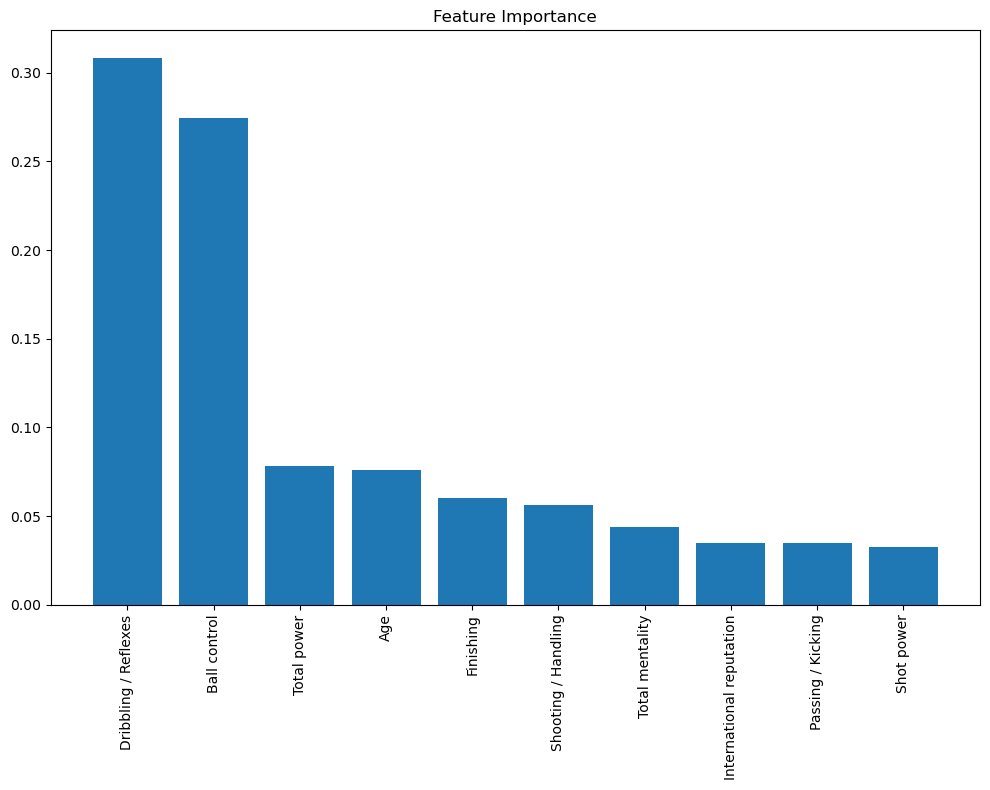

In [13]:

# Get feature importances
importances = best_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Inferencing with randomforest

In [ ]:
# Initialize empty list for features
feature_names = [
    "Age", "Dribbling / Reflexes", "Passing / Kicking", "Shooting / Handling",
    "International reputation", "Total mentality", "Shot power",
    "Total power", "Ball control", "Finishing"
]

# Collect user input for each feature
player_features = [
    23,	92,	80,	89,	4,361,88,410,91,93  
]

# Convert input to NumPy array for Random Forest
player_features = np.array(player_features).reshape(1, -1)

# Perform prediction using the best Random Forest model
market_value_rf = best_model.predict(player_features)

# Output the market value in the original scale
predicted_market_value_rf = market_value_rf[0]  
print(f"Predicted Market Value (Random Forest): {predicted_market_value_rf:.2f}")


Predicted Market Value (Random Forest): 149996388.62


/home/ronak/miniconda3/envs/bajra_venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
